In [100]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [101]:
#Load data set
file=pd.read_csv("/content/Sleep_health_and_lifestyle_dataset.csv")
file.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [102]:
#remove following columns
NewData=file.drop(columns=['Person ID','Occupation', 'Quality of Sleep',"Sleep Duration","Heart Rate","Daily Steps","Sleep Disorder","Physical Activity Level"])
NewData.head()

,Gender,Age,Stress Level,BMI Category,Blood Pressure
0,Male,27,6,Overweight,126/83
1,Male,28,8,Normal,125/80
2,Male,28,8,Normal,125/80
3,Male,28,8,Obese,140/90
4,Male,28,8,Obese,140/90


In [103]:
# Check for missing values and handle them appropriately
missing_values = NewData.isnull().sum()
print(missing_values)

Gender            0
Age               0
Stress Level      0
BMI Category      0
Blood Pressure    0
dtype: int64


In [104]:
# extract the systolic & diastolic blood pressure values from column `Blood_Pressure`
NewData['Systolic'] = NewData['Blood Pressure'].str.split('/').str[0].astype(int)
NewData.head()

,Gender,Age,Stress Level,BMI Category,Blood Pressure,Systolic
0,Male,27,6,Overweight,126/83,126
1,Male,28,8,Normal,125/80,125
2,Male,28,8,Normal,125/80,125
3,Male,28,8,Obese,140/90,140
4,Male,28,8,Obese,140/90,140


In [105]:
#Different name has been given for same category. Replaced Normal weight to normal
NewData['BMI Category'] = NewData['BMI Category'].replace("Normal Weight", "Normal")
NewData

,Gender,Age,Stress Level,BMI Category,Blood Pressure,Systolic
0,Male,27,6,Overweight,126/83,126
1,Male,28,8,Normal,125/80,125
2,Male,28,8,Normal,125/80,125
3,Male,28,8,Obese,140/90,140
4,Male,28,8,Obese,140/90,140
...,...,...,...,...,...,...
369,Female,59,3,Overweight,140/95,140
370,Female,59,3,Overweight,140/95,140
371,Female,59,3,Overweight,140/95,140
372,Female,59,3,Overweight,140/95,140


In [106]:
#BMI_Category is a categorical variable. This function has written to make it numeric. Here average value was considered
def BMI(Category):
    if Category =="Normal":
        return 21.7
    elif Category=="Overweight":
        return 27.45
    elif Category == "Obese":
        return 34.95
    else:
        return 18.5

In [107]:
#Gender is a categorical variable. This function has written to make it numeric
def Gender(Category):
    if Category =="Male":
        return 1
    else:
        return 0

In [108]:
#Create Sex column
df = pd.DataFrame(NewData)
df['Sex'] = df['Gender'].apply(Gender)

In [109]:
NewData=df

In [110]:
#create BMI column
NewData['BMI'] = NewData.apply(lambda row: BMI(row['BMI Category']), axis=1)
NewData.head()

,Gender,Age,Stress Level,BMI Category,Blood Pressure,Systolic,Sex,BMI
0,Male,27,6,Overweight,126/83,126,1,27.45
1,Male,28,8,Normal,125/80,125,1,21.70
2,Male,28,8,Normal,125/80,125,1,21.70
3,Male,28,8,Obese,140/90,140,1,34.95
4,Male,28,8,Obese,140/90,140,1,34.95


In [111]:
#Remove categorical columns
NewData=NewData.drop(columns=['Blood Pressure','BMI Category','Gender'])
NewData.head()

,Age,Stress Level,Systolic,Sex,BMI
0,27,6,126,1,27.45
1,28,8,125,1,21.70
2,28,8,125,1,21.70
3,28,8,140,1,34.95
4,28,8,140,1,34.95


In [112]:
#Correlation matrix was created
df = pd.DataFrame(NewData)

correlation_matrix = df.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                   Age  Stress Level  Systolic       Sex       BMI
Age           1.000000     -0.422344  0.605878 -0.596358  0.402452
Stress Level -0.422344      1.000000  0.102818  0.396018  0.153393
Systolic      0.605878      0.102818  1.000000 -0.210527  0.727903
Sex          -0.596358      0.396018 -0.210527  1.000000 -0.221098
BMI           0.402452      0.153393  0.727903 -0.221098  1.000000


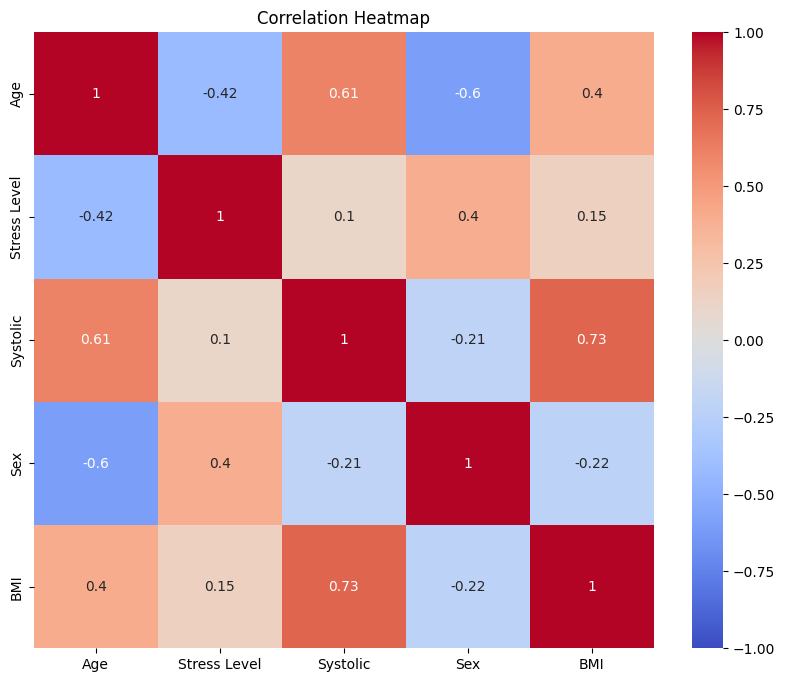

In [113]:
#Draw heat map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()